In [1]:
import numpy as np
import acepacutils as apu
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load in a of PAC 2D simulation and plot

In [2]:
path_pac2d = "/STER/thomasko/APU_examples_simulations/pac-for-2D/"
path_ace = "/STER/thomasko/APU_examples_simulations/ACE-for-2D/"
path_figsave = "/lhome/thomasko/Downloads/"

#2D disequilibrium chemistry simulation
PAC2D = apu.PAC2D(path_pac2d, path_figsave)
PAC2D.read_2D_pac(only_last_rot=False)

#Initialisation of chemical equilibrium at the substellar point
ACE1D = apu.ACE1D(path_ace)
ACE1D.read_1D_ace(keyword="sub") #sub for substellar

[-I] No rotation was selected, so all rotations are included in the subset


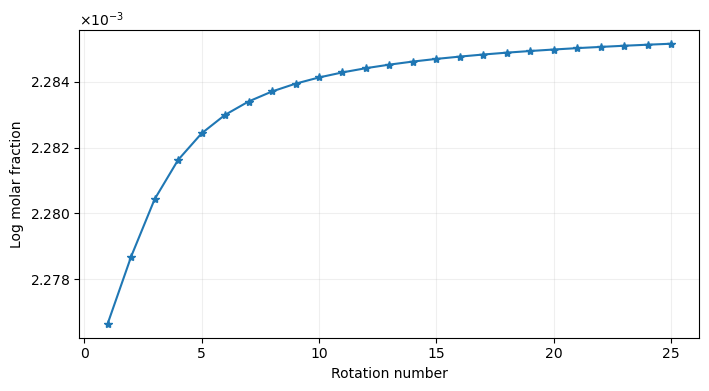

In [3]:
PAC2D.plot_convergence(side = "antistellar",
                       pressure=1e-3,
                      molecule = "CO")

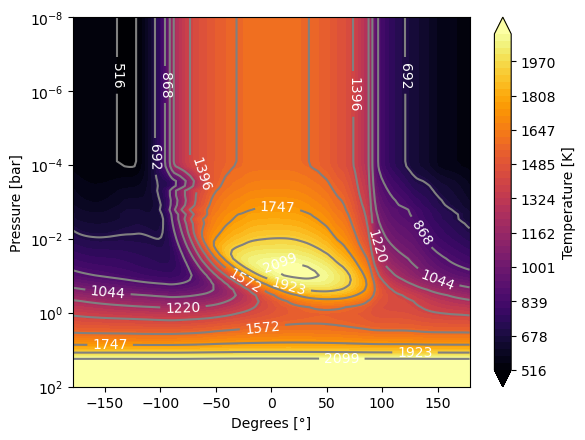

In [4]:
PAC2D.plot_LPT(degrees=True)

[-W] Plotting ACE chemical equilibrium. The user is responsible to know which longitudes the ACE file belongs to


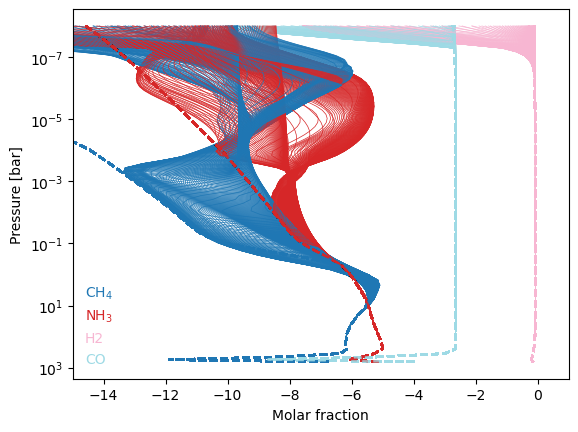

In [5]:
PAC2D.plot_chemistry_on_all_longitudes(
    list_molecules=["CH4", "NH3", "H2", "CO"],
    ACE = ACE1D
)

[-W] Plotting ACE chemical equilibrium. The user is responsible to know which longitudes the ACE file belongs to


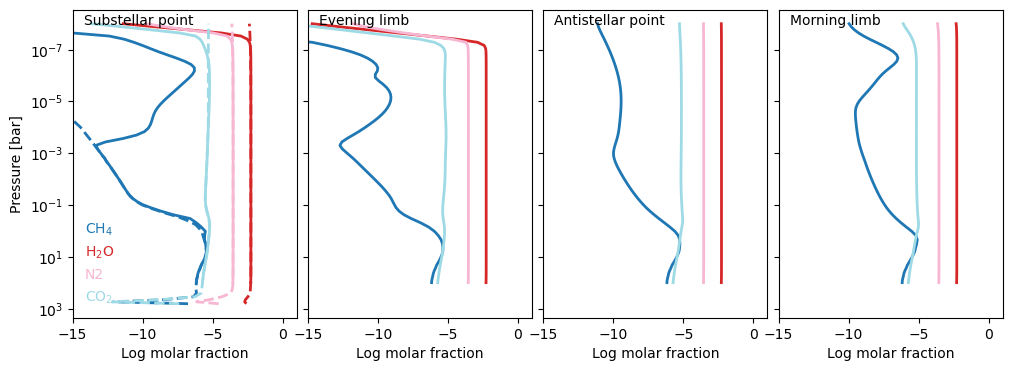

In [6]:
PAC2D.plot_chemistry_on_4_longitudes(
    list_molecules=["CH4", "H2O", "N2", "CO2"],
    ACE_dict = {"substellar": ACE1D}
)

In [7]:
# PAC2D.load_star_file()
# PAC2D.plot_star_spectrum()
# PAC2D.load_eddy_file()
# PAC2D.plot_eddy_diffusion()

# Set-up an atmosphere object for pRT

In [8]:
line_species = ['SO', 'C2H2', 'CO2',
                'OH', 'HCN', 'NH3',
                'CH4', 'CO', 'H2O',
               ]
rayleigh_species = ["He", "H2"]
cloud_species = ['Mg2SiO4(c)_cd']
continuum_opacities = ['H2-H2', 'H2-He']
wlen_bords_micron = [1, 2.5]

PRTATM = apu.PRT_ATM(line_species,
                    rayleigh_species,
                    cloud_species,
                    continuum_opacities,
                    wlen_bords_micron)

PRTATM.load_atmosphere_object()

  Read line opacities of SO...
 Done.
  Read line opacities of C2H2...
 Done.
  Read line opacities of CO2...
 Done.
  Read line opacities of OH...
 Done.
  Read line opacities of HCN...
 Done.
  Read line opacities of NH3...
 Done.
  Read line opacities of CH4...
 Done.
  Read line opacities of CO_all_iso_HITEMP...
 Done.
  Read line opacities of H2O_Exomol...
 Done.

  Read in opacity of cloud species Mg2SiO4 ...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



# Create a transmission spectrum with petitRADTRANS

In [9]:
# Set the mass fractions
mf_additional = {
    'SO': np.ones(PAC2D.resolution_z)*1e-15,
    'Mg2SiO4(c)': np.ones(PAC2D.resolution_z)*1e-15
}
PAC2D.set_mass_fractions_and_PT(PRT_ATM=PRTATM,
                         additional_massFractions=mf_additional,
                         side = 'evening',
                         width_pi=0.01,
                         rotation="last"
                        )

# Compute the transmission spectrum
radius = {}
radius['Mg2SiO4(c)'] = 1e-5 * np.ones(PAC2D.resolution_z)

PAC2D.compute_transmission_spectrum(
    ref_R=1,
    radius=radius
)

[-I] Succesfully computed the transmission spectrum


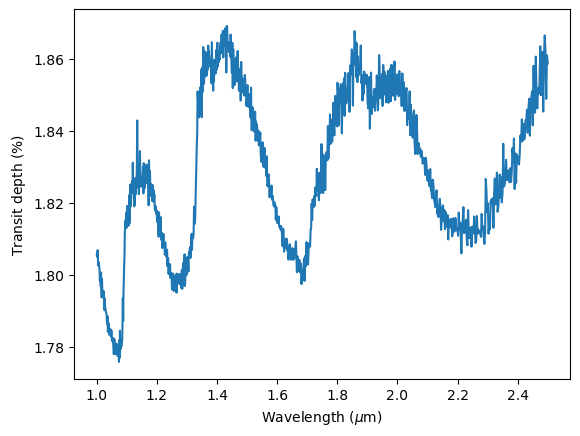

In [10]:
PAC2D.plot_transmission_spectrum()

# What is the difference between the morning and evening limb?

[-I] Succesfully computed the transmission spectrum
[-I] Succesfully computed the transmission spectrum


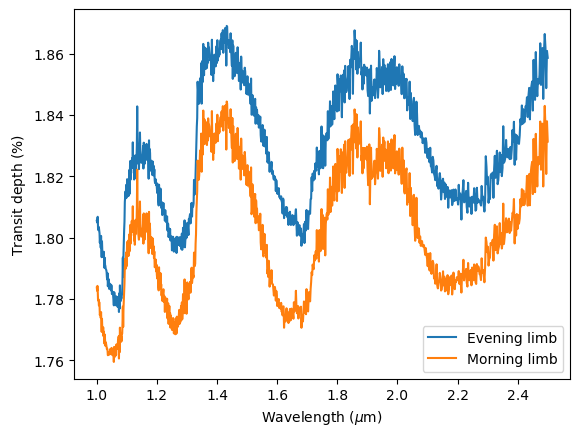

In [11]:
fig, ax = plt.subplots()

#Plot the spectrum of the evening limb
PAC2D.set_mass_fractions_and_PT(PRT_ATM=PRTATM,
                                additional_massFractions=mf_additional,
                               side="evening")
PAC2D.compute_transmission_spectrum(ref_R=1,radius=radius)
PAC2D.plot_transmission_spectrum(ax=ax)



#Plot the spectrum of the morning limb
PAC2D.set_mass_fractions_and_PT(PRT_ATM=PRTATM,
                                additional_massFractions=mf_additional,
                               side="morning")
PAC2D.compute_transmission_spectrum(ref_R=1,radius=radius)
PAC2D.plot_transmission_spectrum(ax=ax)

ax.legend(["Evening limb", "Morning limb"])